In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv(r'C:\Users\PuruGupta\Documents\Kaggle\credit card\BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [75]:
#data1 = data.iloc[:,:-2]
data1.info()
#data1.head()
#data1['CLIENTNUM'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [17]:
n = data1.groupby(['Gender','Attrition_Flag']).size().reset_index(name='Count')
n

,Gender,Attrition_Flag,Count
0,F,Attrited Customer,930
1,F,Existing Customer,4428
2,M,Attrited Customer,697
3,M,Existing Customer,4072


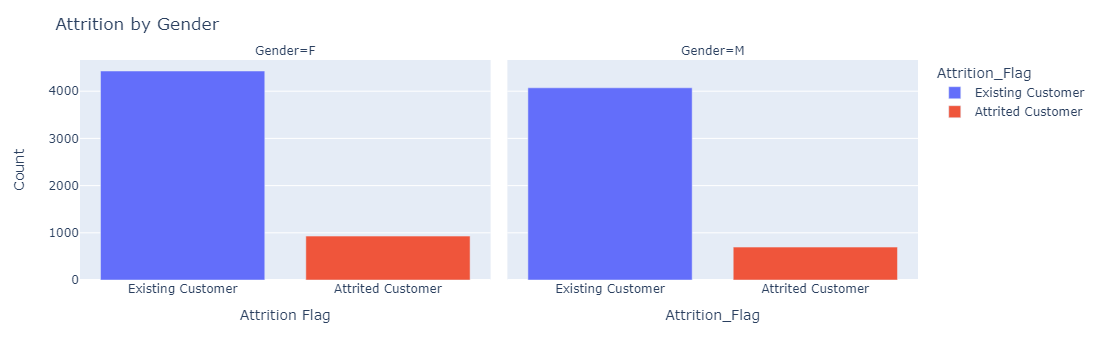

In [103]:
import plotly.express as px
fig = px.bar(n, x='Attrition_Flag', y='Count', color='Attrition_Flag', facet_col='Gender',
            category_orders={'Attrition_Flag': ['Existing Customer', 'Attrited Customer']})
fig.update_layout(title_text='Attrition by Gender',
                  xaxis_title='Attrition Flag',
                  yaxis_title='Count')

annotation_text = "Female Attrition Rate: 17.36%<br>"
annotation_text += "Male Attrition Rate: 14.6%<br><br>"
annotation_text += "Overall 2.76% difference"

fig.show()

In [51]:
m = pd.DataFrame(data1[data1['Attrition_Flag']=='Attrited Customer'])
p = m.groupby(['Gender','Card_Category']).size().reset_index(name='Count')
p.rename(columns={'Count':'Attrited Count'}, inplace=True)
x=pd.DataFrame(data1[data1['Attrition_Flag']=='Existing Customer'])
l=x.groupby(['Gender','Card_Category']).size().reset_index(name='Count')
l.rename(columns={'Count':'Existing Count'}, inplace=True)
me = p.merge(l, on=['Gender','Card_Category'], how='inner')

me['Attrited Count'] = me['Attrited Count'].astype(float)
me['Existing Count'] = me['Existing Count'].astype(float)
me['ratio']=me['Attrited Count']/me['Existing Count']
me

,Gender,Card_Category,Attrited Count,Existing Count,ratio
0,F,Blue,890.00,4211.00,0.21
1,F,Gold,8.00,30.00,0.27
2,F,Platinum,4.00,5.00,0.80
3,F,Silver,28.00,182.00,0.15
4,M,Blue,629.00,3706.00,0.17
5,M,Gold,13.00,65.00,0.20
6,M,Platinum,1.00,10.00,0.10
7,M,Silver,54.00,291.00,0.19


In [52]:
#As is seen the customer retention in Blueand Silver card category in general is much higher as compared to other categories.
#Lets focus our attention on the Blue category as of now 

In [60]:
m = m[m['Card_Category']=='Blue']
x = x[x['Card_Category']=='Blue']
inc = m.groupby(['Income_Category']).size().reset_index(name='Attrited_count')
inc2 =x.groupby(['Income_Category']).size().reset_index(name='Existing_count')
mer1 = inc.merge(inc2, on ='Income_Category', how='inner')
mer1['ratio'] = mer1['Attrited_count']/(mer1['Existing_count']+mer1['Attrited_count'])
mer1

,Income_Category,Attrited_count,Existing_count,ratio
0,$120K +,113,532,0.18
1,$40K - $60K,257,1418,0.15
2,$60K - $80K,172,1101,0.14
3,$80K - $120K,215,1180,0.15
4,Less than $40K,586,2817,0.17
5,Unknown,176,869,0.17


In [61]:
#There are no significant spikes in the income category group

In [64]:
inc = m.groupby(['Dependent_count']).size().reset_index(name='Attrited_count')
inc2 =x.groupby(['Dependent_count']).size().reset_index(name='Existing_count')
mer1 = inc.merge(inc2, on ='Dependent_count', how='inner')
mer1['ratio'] = mer1['Attrited_count']/(mer1['Existing_count']+mer1['Attrited_count'])
mer1

,Dependent_count,Attrited_count,Existing_count,ratio
0,0,126,713,0.15
1,1,256,1483,0.15
2,2,385,2098,0.16
3,3,456,2090,0.18
4,4,238,1203,0.17
5,5,58,330,0.15


In [65]:
#People who have 2-4 dependent on them are leaving

In [68]:
inc = m.groupby(['Dependent_count','Gender']).size().reset_index(name='Attrited_count')
inc2 =x.groupby(['Dependent_count','Gender']).size().reset_index(name='Existing_count')
mer1 = inc.merge(inc2, on =['Dependent_count','Gender'], how='inner')
mer1['ratio'] = mer1['Attrited_count']/(mer1['Existing_count']+mer1['Attrited_count'])
mer1

,Dependent_count,Gender,Attrited_count,Existing_count,ratio
0,0,F,74,384,0.16
1,0,M,52,329,0.14
2,1,F,163,791,0.17
3,1,M,93,692,0.12
4,2,F,216,1108,0.16
5,2,M,169,990,0.15
6,3,F,262,1083,0.19
7,3,M,194,1007,0.16
8,4,F,146,659,0.18
9,4,M,92,544,0.14


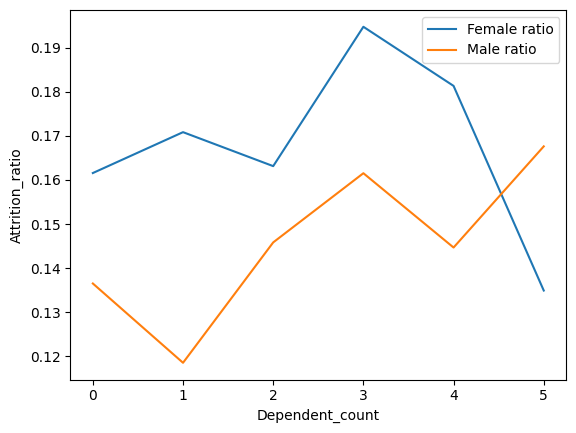

In [72]:
plt.plot(mer1[mer1['Gender']=='F']['Dependent_count'],mer1[mer1['Gender']=='F']['ratio'],label='Female ratio')
plt.plot(mer1[mer1['Gender']=='M']['Dependent_count'],mer1[mer1['Gender']=='M']['ratio'],label='Male ratio')
plt.xlabel('Dependent_count')
plt.ylabel('Attrition_ratio')
plt.legend()
plt.show()

In [76]:
#As is visible in case of Men they usually drop if the number of dependent family members are on higher end.
#But in case of women they usually close theor credit cards if they have 3 or 4 dependables in their house and not more than that

In [96]:

male_attrtion = m[(m['Gender']=='M') & ((m['Dependent_count']==3) | (m['Dependent_count']==5))]
male_existing = x[(x['Gender']=='M') & ((x['Dependent_count']==3) | (x['Dependent_count']==5))]
female_attrition =  m[(m['Gender']=='F') & ((m['Dependent_count']==3) | (m['Dependent_count']==4))]
female_existing = x[(x['Gender']=='F') & ((x['Dependent_count']==3) | (x['Dependent_count']==4))]
male_a = male_attrtion.groupby(['Income_Category']).size().reset_index(name='attrition_count')
male_e = male_existing.groupby(['Income_Category']).size().reset_index(name='existing_count')
female_a = female_attrition.groupby(['Income_Category']).size().reset_index(name='attrition_count')
female_e = female_existing.groupby(['Income_Category']).size().reset_index(name='existing_count')
male = male_a.merge(male_e, on ='Income_Category', how='inner')
male['attrition_ratio'] = male['attrition_count']/(male['attrition_count']+male['existing_count'])
female = female_a.merge(female_e, on ='Income_Category', how='inner')
female['attrition_ratio'] = female['attrition_count']/(female['attrition_count']+female['existing_count'])

In [98]:
male

,Income_Category,attrition_count,existing_count,attrition_ratio
0,$120K +,32,173,0.16
1,$40K - $60K,37,176,0.17
2,$60K - $80K,65,368,0.15
3,$80K - $120K,84,395,0.18
4,Less than $40K,5,38,0.12


In [100]:
female

,Income_Category,attrition_count,existing_count,attrition_ratio
0,$40K - $60K,76,340,0.18
1,Less than $40K,252,1054,0.19
2,Unknown,80,348,0.19


In [101]:
#We are not able to see any particular spikes in these two categories. Prehaps we need to look at the data from a different perspective